# DATA SET: Bank_Personal_Loan_Modelling.csv

### Author: Kranti Sambhaji Walke 

Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain:Banking

Context:This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Objective:The classification goal is to predict the likelihood of a liability customer buying personal loans.

## 1. Import the necessary libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

## 2. Read the data 

In [2]:
my_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
my_data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","Personal_Loan","SecuritiesAccount","CDAccount","Online","CreditCard"]


## 3. Basic EDA

In [3]:
my_data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


a.The variable ID does not add any particular information.

b.There are 2 nominal variables:

    1.ID    
    2.Zip Code
    
c.There are 2 Ordinal Categorical Variables:

    1.Family - Family size of the customer    
    2.Education - education level of the customer
    
d.There are 5 independent variables:

    1.Age:Age of the customer
    2.Experience:Years of experience of the customer
    3.Income:Annual income in dollars
    4.CCAvg:Average credit card spending
    5.Mortage:Value of House Mortgage
    
e.There are 5 binary category variables:

    1.Personal Loan:Did this customer accept the personal loan offered in the last campaign?
    2.Securities Account:Does the customer have a securities account with the bank?
    3.CD Account:Does the customer have a certificate of deposit (CD) account with the bank?
    4.Online:Does the customer use internet banking facilities?
    5.Credit Card:Does the customer use a credit card issued by UniversalBank?

f.And the Target variable is :Personal Loan

### a. Shape of the data

In [4]:
my_data.shape

(5000, 14)

There are 5000 customers.

In [5]:
my_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

### b. Data type of each attribute 

In [6]:
my_data.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
Personal_Loan          int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

Almost all atributes are numeric. 

## c.Check for the null values 

In [7]:
#null values
my_data.isnull().values.any()

False

## d. Checking the presence of missing values 

In [8]:
val=my_data.isnull().values.any()

if val==True:
    print("Missing values present : ", my_data.isnull().values.sum())
    my_data=my_data.dropna()
else:
    print("No missing values present")

No missing values present


## e. 5 point summary of numerical attributes 

In [9]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
Personal_Loan        5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## f.Finding unique data 

In [11]:
my_data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [12]:
#Find Shape
my_data.shape

(5000, 14)

In [13]:
#Find Mean
my_data.mean()

ID                    2500.500000
Age                     45.338400
Experience              20.104600
Income                  73.774200
ZIPCode              93152.503000
Family                   2.396400
CCAvg                    1.937938
Education                1.881000
Mortgage                56.498800
Personal_Loan            0.096000
SecuritiesAccount        0.104400
CDAccount                0.060400
Online                   0.596800
CreditCard               0.294000
dtype: float64

In [14]:
#Find Median
my_data.median()

ID                    2500.5
Age                     45.0
Experience              20.0
Income                  64.0
ZIPCode              93437.0
Family                   2.0
CCAvg                    1.5
Education                2.0
Mortgage                 0.0
Personal_Loan            0.0
SecuritiesAccount        0.0
CDAccount                0.0
Online                   1.0
CreditCard               0.0
dtype: float64

In [15]:
#Find Standard Deviation
my_data.std()

ID                   1443.520003
Age                    11.463166
Experience             11.467954
Income                 46.033729
ZIPCode              2121.852197
Family                  1.147663
CCAvg                   1.747659
Education               0.839869
Mortgage              101.713802
Personal_Loan           0.294621
SecuritiesAccount       0.305809
CDAccount               0.238250
Online                  0.490589
CreditCard              0.455637
dtype: float64

## g.Ploting histogram to check that if data columns are normal or almost normal or not 

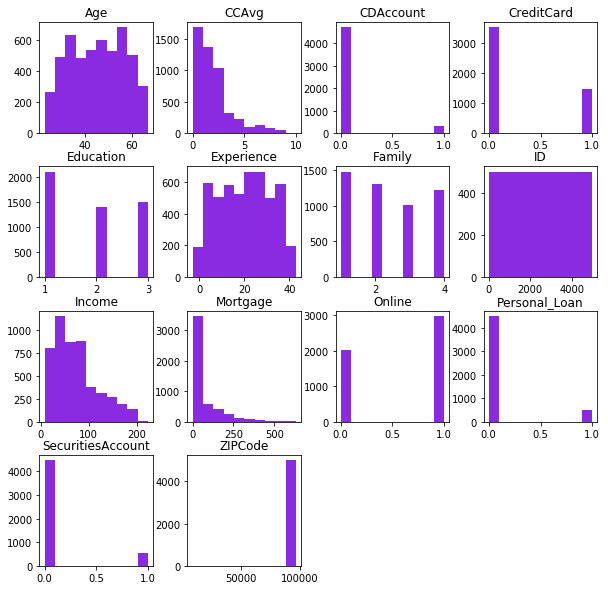

In [16]:
my_data.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

# 4.PairPlot

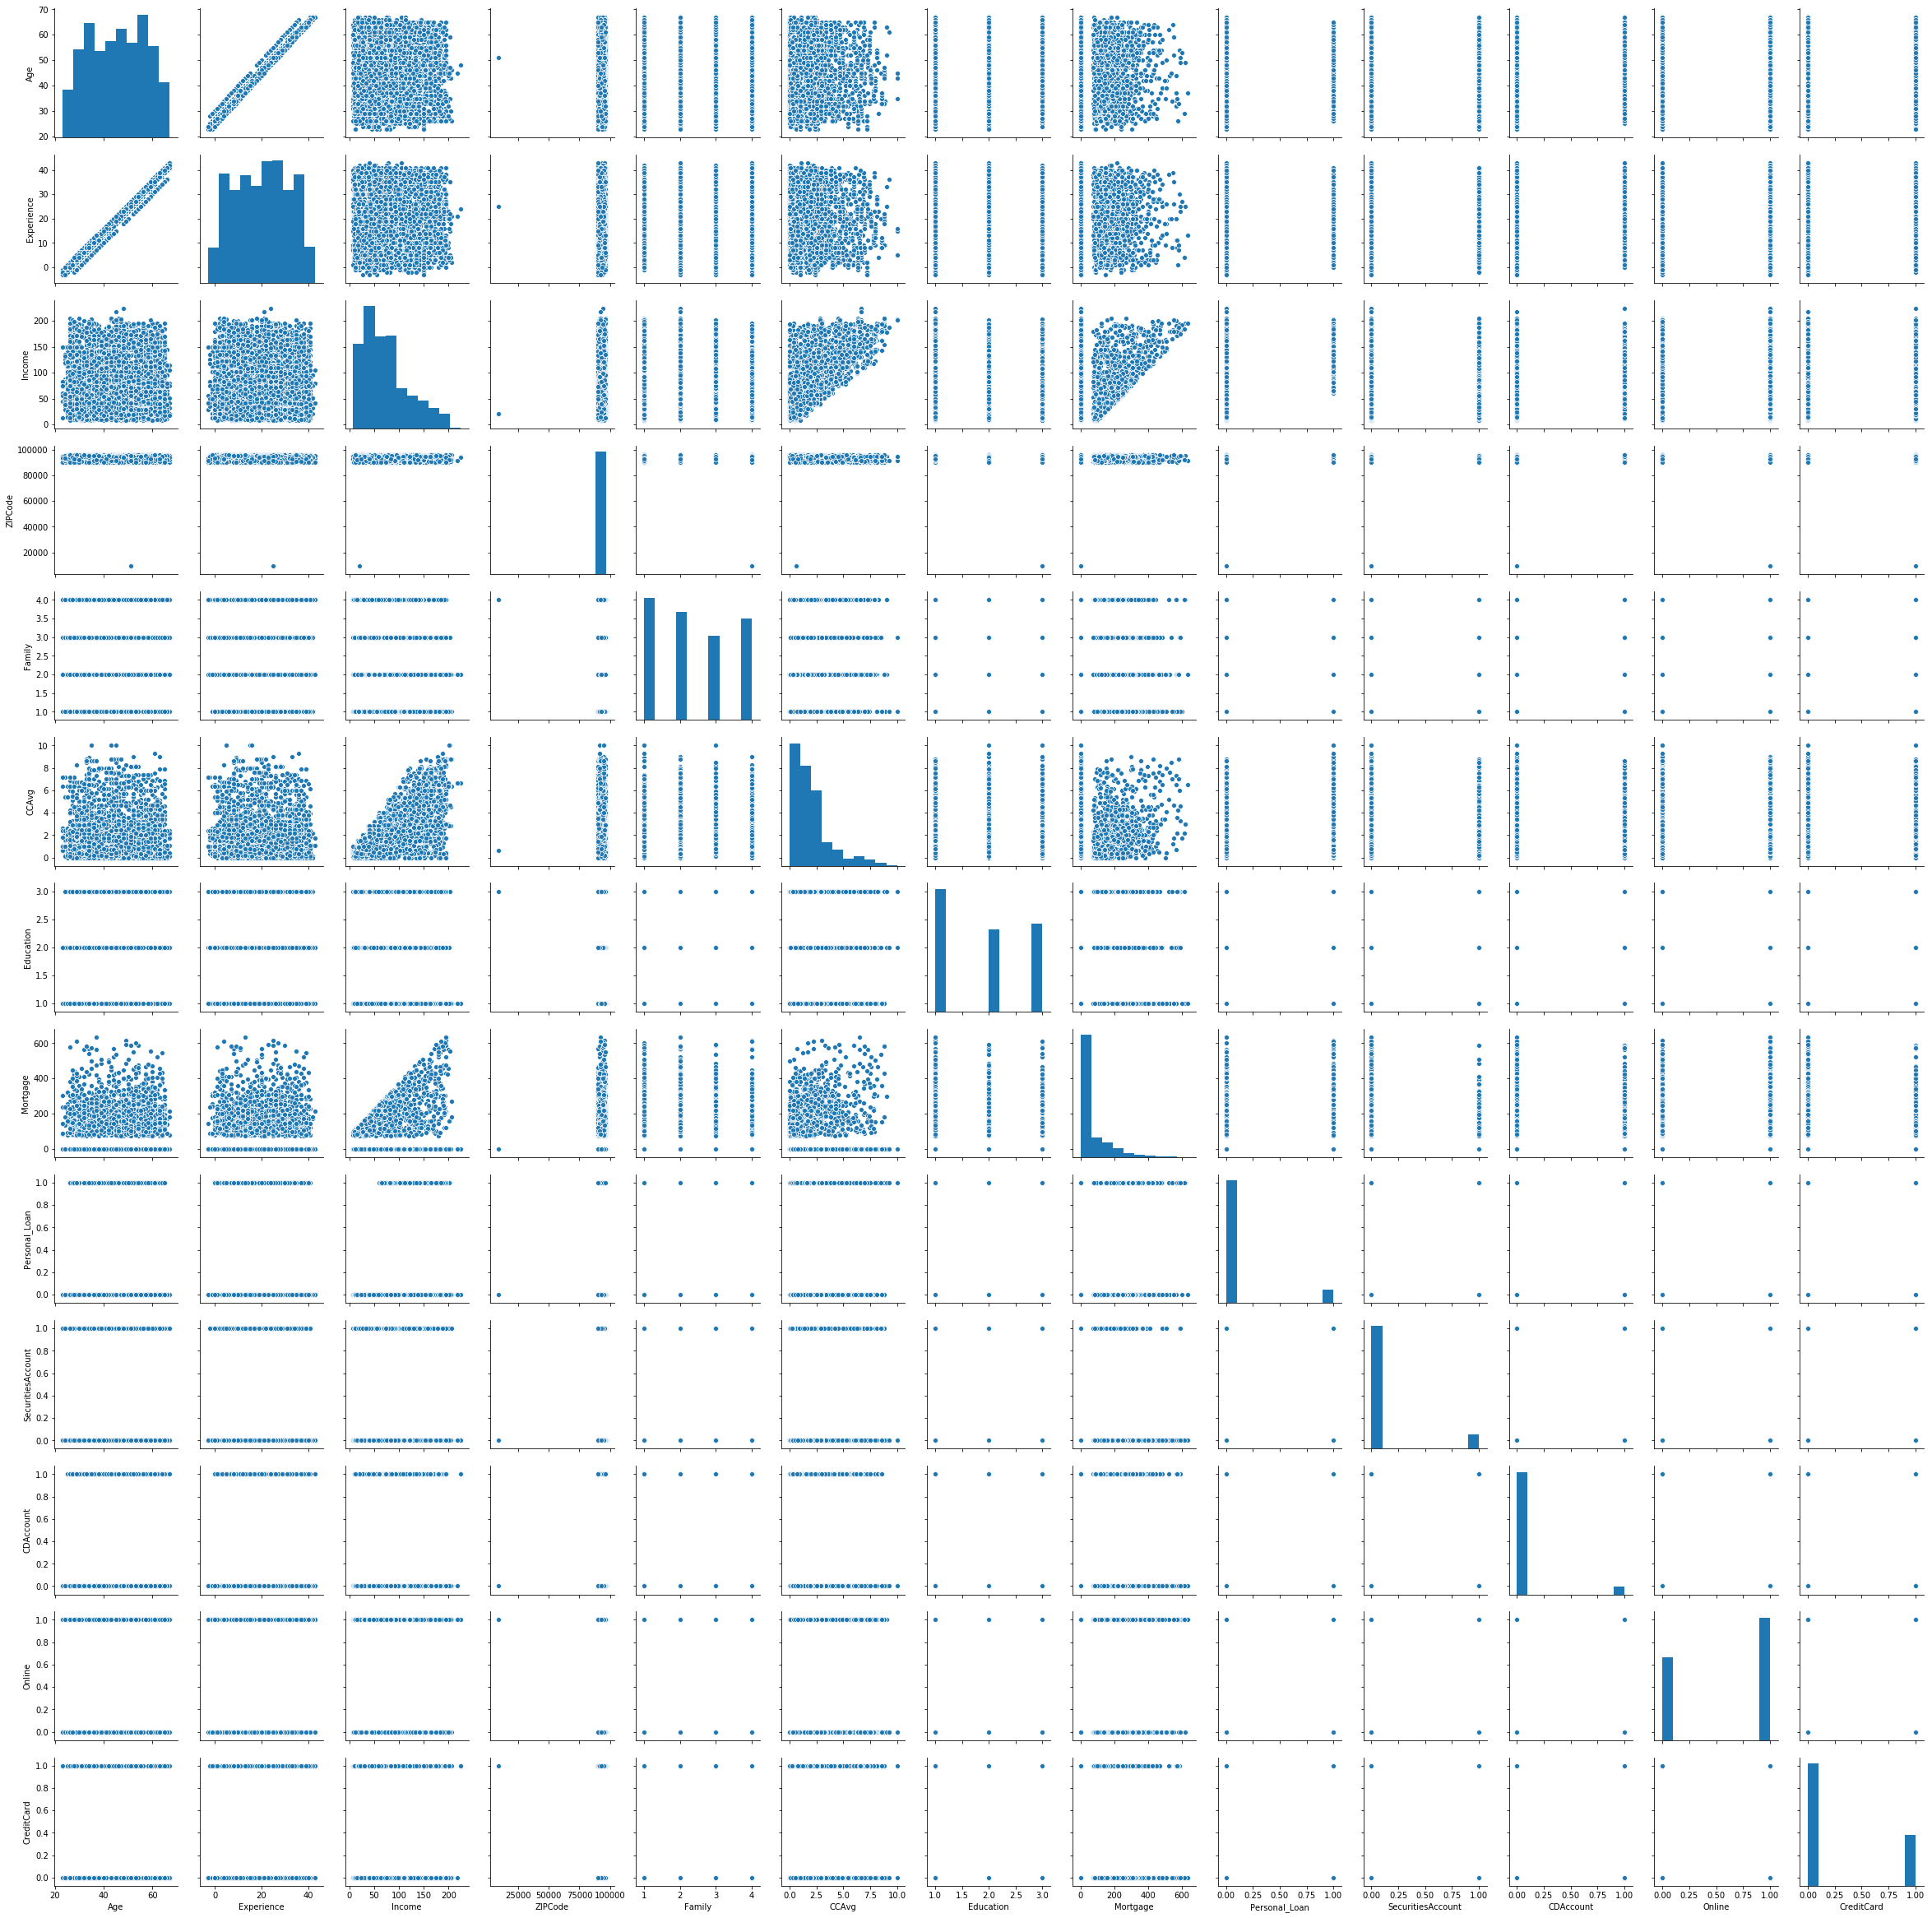

In [17]:
sns.pairplot(my_data.iloc[:,1:])

### 1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.
### 2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
### 3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.
### 4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
### 5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
### 6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
### 7.Distributin of "Family" and "Education" are evenly distributed

In [18]:
my_data[my_data['Experience'] < 0]['Experience'].count()

52

There are 52 records with negative experience.We have to clean it.

### Cleaning the negative values 

In [19]:
my_dataExp = my_data.loc[my_data['Experience'] >0]
negExp = my_data.Experience < 0
column_name = 'Experience'
my_data_list = my_data.loc[negExp]['ID'].tolist()

In [20]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

52 records with negative experience

In [21]:
for id in my_data_list:
    age = my_data.loc[np.where(my_data['ID']==id)]["Age"].tolist()[0]
    education = my_data.loc[np.where(my_data['ID']==id)]["Education"].tolist()[0]
    df_filtered = my_dataExp[(my_dataExp.Age == age) & (my_dataExp.Education == education)]
    exp = df_filtered['Experience'].median()
    my_data.loc[my_data.loc[np.where(my_data['ID']==id)].index, 'Experience'] = exp
    
#The records with the ID, get the values of Age and Education columns.
#Then apply filter for the records matching the criteria from the dataframe 
#which has records with positive experience and take the median.
#Apply the median again to the location(records) which had negative experience.   

### Check if there are any records still present with negative Experience 

In [22]:
my_data[my_data['Experience'] < 0]['Experience'].count()

0

In [23]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Measure of skewness  

In [24]:
my_data.skew(axis = 0, skipna = True) 

ID                    0.000000
Age                  -0.029341
Experience           -0.013188
Income                0.841339
ZIPCode             -12.500221
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal_Loan         2.743607
SecuritiesAccount     2.588268
CDAccount             3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

## 5.Boxplot 

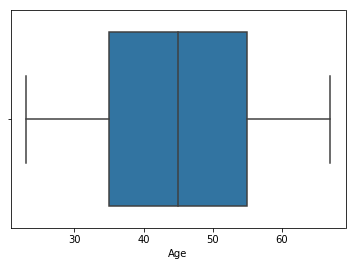

In [25]:
sns.boxplot(x=my_data["Age"])

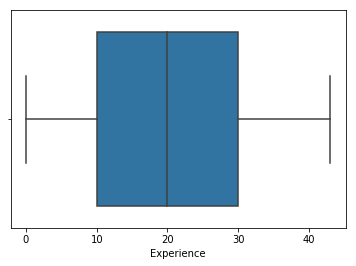

In [26]:
sns.boxplot(x=my_data["Experience"])

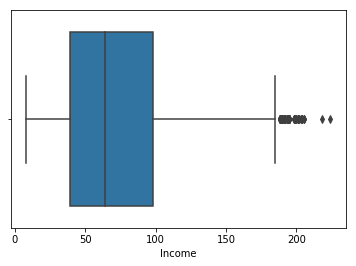

In [27]:
sns.boxplot(x=my_data["Income"])

AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)


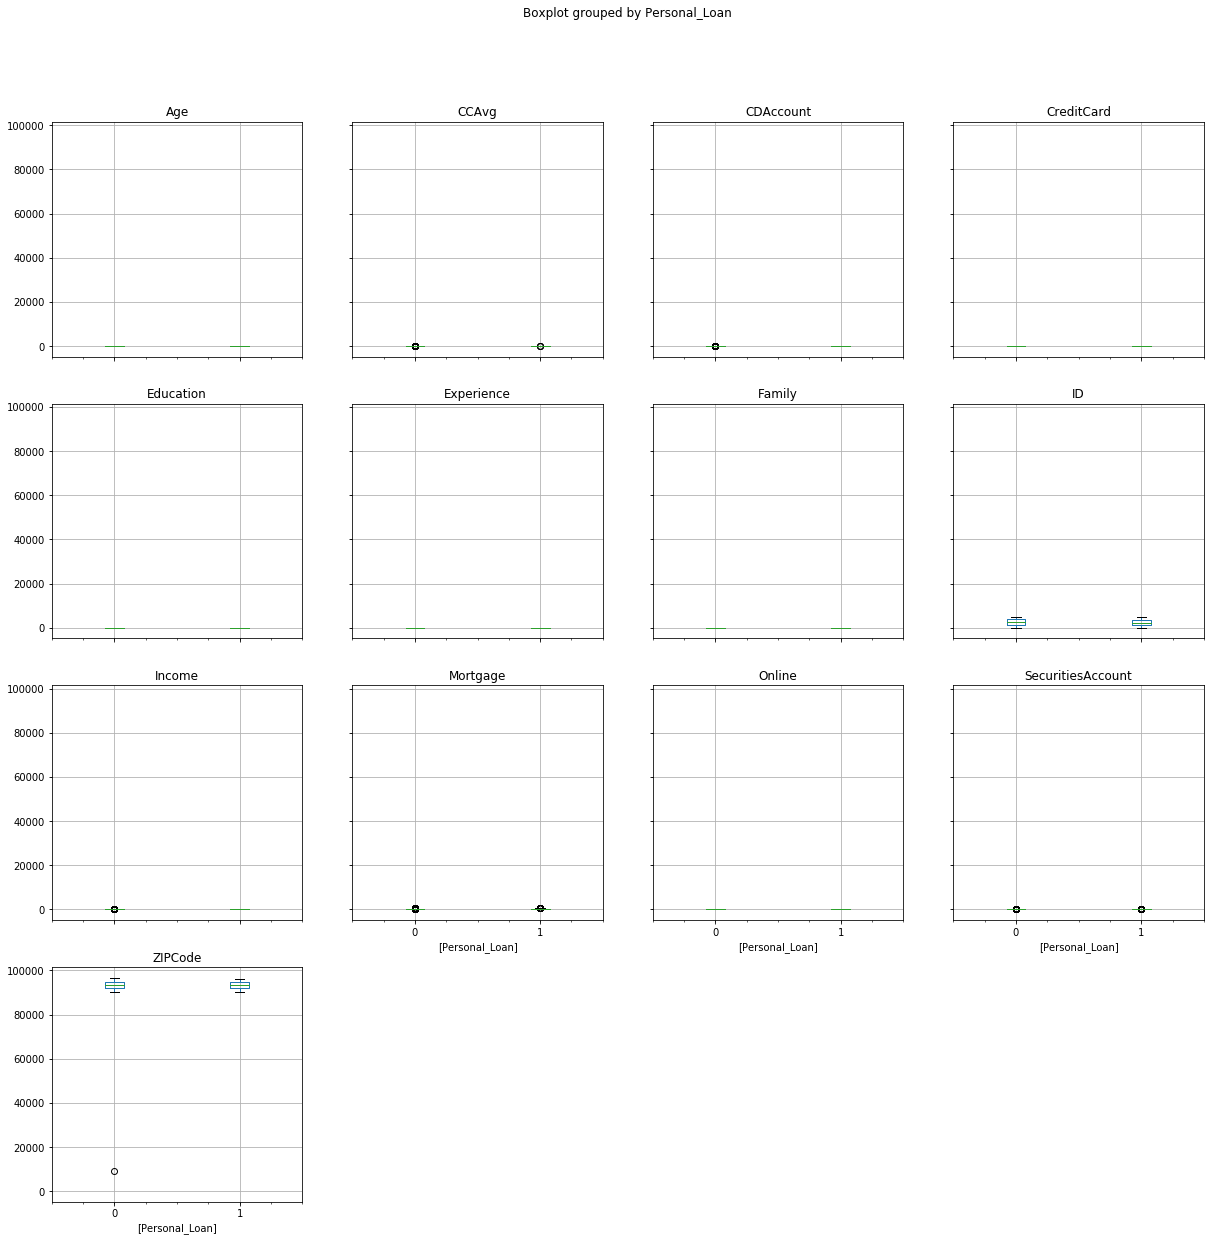

In [28]:
import matplotlib.pylab as plt

my_data.boxplot(by = 'Personal_Loan',  layout=(4,4), figsize=(20, 20))
print(my_data.boxplot('Age'))
print(my_data.boxplot('Income'))
print(my_data.boxplot('Education'))


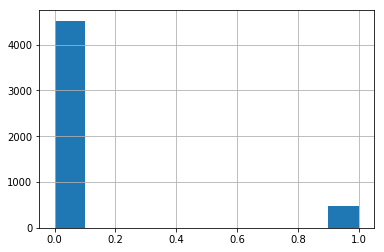

In [29]:
my_data['Personal_Loan'].hist(bins=10)

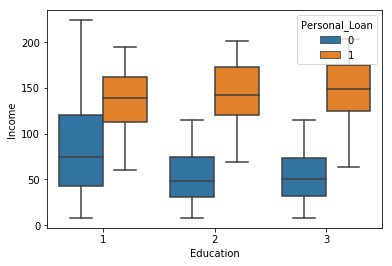

In [30]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=my_data)

###  Here the customers whose education level is 1 is having more income than the others.

### We can see the customers who has taken the Personal Loan have the same Income levels. 

### Also the Customers with education levels 2 and 3 have same income level with no Personal Loan. 

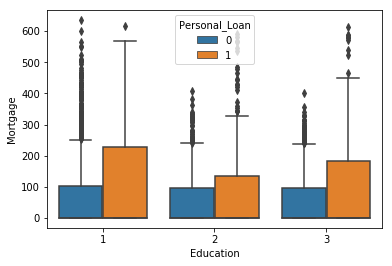

In [31]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=my_data)

### There are so many outliers in each case. 

### But the customers with and without Personal Loan  have high Mortage.

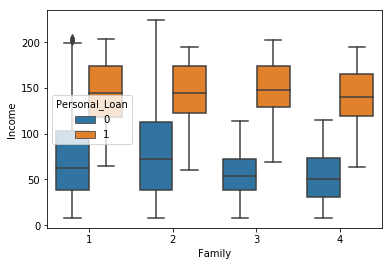

In [32]:
sns.boxplot(x="Family",y="Income",hue="Personal_Loan",data=my_data)

###  Families with income less than 100K are less likely to take loan,than families with high income

# 6.CountPlot

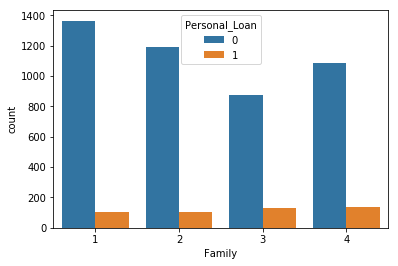

In [33]:
sns.countplot(x='Family',data=my_data,hue='Personal_Loan')

### Ther is no that much impact on Personal Loan if we consider Family attribute. 

### But the Family with size 3 is taking more Personal loan as compare to other family size. 

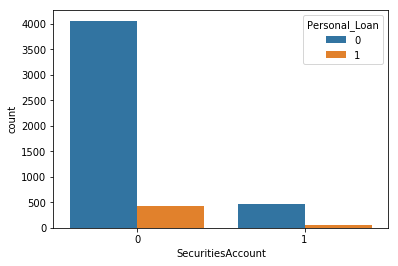

In [34]:
sns.countplot(x="SecuritiesAccount", data=my_data,hue="Personal_Loan")

### The Majority is the customers  who do not have Personal loan have Securities Account.

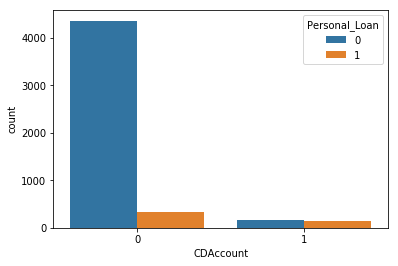

In [35]:
sns.countplot(x='CDAccount',data=my_data,hue='Personal_Loan')

### The customers having no CDAccount do not have Personal loan. 

### And the customers with CDAccount almost have Personal Loan.  

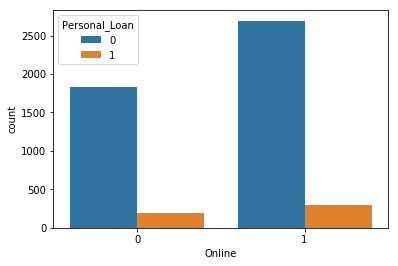

In [36]:
sns.countplot(x='Online',data=my_data,hue='Personal_Loan')

### Customers with Personal Loan have less count in both the conditions. 

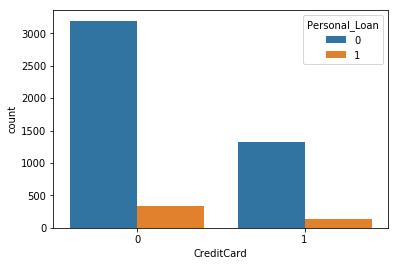

In [37]:
sns.countplot(x='CreditCard',data=my_data,hue='Personal_Loan')

### Customers with Personal Loan have less count in both the conditions. 

# 7.ScatterPlot

Text(0.5, 1.0, 'Distribution of Education by Age and Experience')

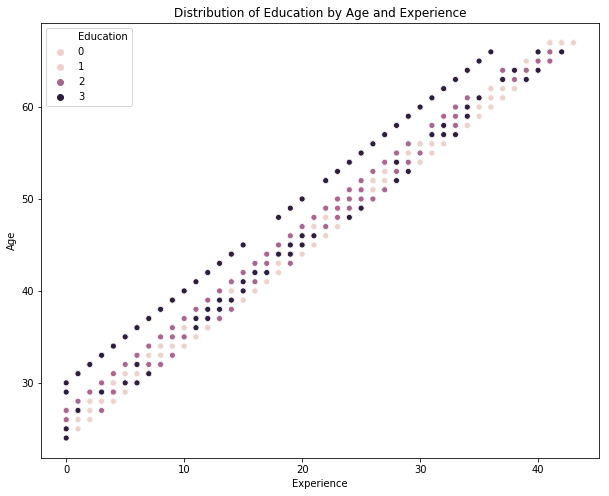

In [38]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Experience", y = "Age",data =my_data, hue = "Education")
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Distribution of Education by Age and Experience")

### Experience and Age gives a positive correlation ,as Experience increases Age also increases.

### We can see with the help of colors of education level that more people are in the under graduate level.  

# 8.DistPlot

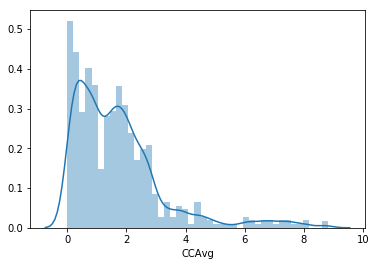

In [39]:
sns.distplot( my_data[my_data.Personal_Loan == 0]['CCAvg'])

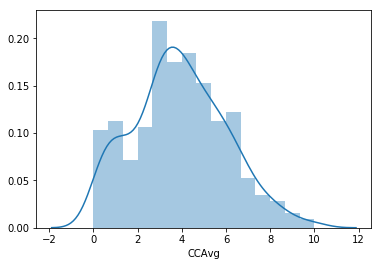

In [40]:
sns.distplot( my_data[my_data.Personal_Loan == 1]['CCAvg'])

### Here we can see that the customers with higher CCAvg have Personal Loan. 

In [41]:
#Credit card spending of Non-Loan customers
my_data[my_data.Personal_Loan == 0]['CCAvg'].median()*1000

1400.0

In [42]:
#Credit card spending of Loan customers
my_data[my_data.Personal_Loan == 1]['CCAvg'].median()*1000

3800.0

### The customers who are spending average  credit card  with a median of 3800 dollar gives a higher probability of Personal loan,whereas the customers who are spending Lower credit card with a median of 1400 dollars are less likely to take a loan.

# 9.Calculate the correlation matrix

In [43]:
cor=my_data.corr()
cor

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,-0.011498,0.001059,0.007381,0.014501,0.007935
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.011498,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


# 10.Heatmap

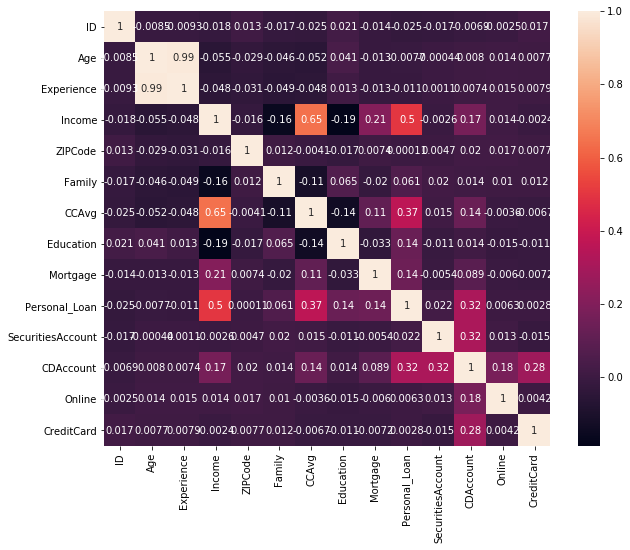

In [44]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

# 11.Conclusion from EDA:

### 1.Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.
### 2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
### 3.We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.
### 4.For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
### 5.For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
### 6.For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
### 7.Distributin of "Family" and "Education" are evenly distributed
### 8.Income and CCAvg is moderately correlated.
### 9.Experience and Age gives a positive correlation.
### 10.Families with income less than 100K are less likely to take loan,than families with high income.
### 11.The customers whose education level is 1 is having more income than the others.
### 12.The customers with and without Personal Loan  have high Mortage.
###  13.Families with income less than 100K are less likely to take loan,than families with high income.
### 14.Ther is no that much impact on Personal Loan if we consider Family attribute. But the Family with size 3 is taking more Personal loan as compare to other family size. 
### 15.The Majority is the customers  who do not have Personal loan have Securities Account.
### 16.The customers having no CDAccount do not have Personal loan. 
### 17.Customers with Personal Loan have less count in both the conditions. 

# 12.Applying classification models (Logistic, K-NN and Naïve Bayes,SVM)

# A.Logistic regression 

In [45]:
data=my_data.drop(['ID','ZIPCode','Experience'], axis =1 )
data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                  5000 non-null int64
Income               5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
Personal_Loan        5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [47]:
data1=data[['Age','Income','Family','CCAvg','Education','Mortgage','SecuritiesAccount','CDAccount','Online','CreditCard','Personal_Loan']]

In [48]:
data1.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Personal_Loan
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0
5,37,29,4,0.4,2,155,0,0,1,0,0
6,53,72,2,1.5,2,0,0,0,1,0,0
7,50,22,1,0.3,3,0,0,0,0,1,0
8,35,81,3,0.6,2,104,0,0,1,0,0
9,34,180,1,8.9,3,0,0,0,0,0,1


In [49]:
data1.shape

(5000, 11)

In [50]:
data1["Personal_Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [51]:
array = data1.values
X = array[:,0:9] # select all rows and first 10 columns which are the attributes
Y = array[:,10]   # select all rows and the 10th column which is the classification "0", "1"
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

In [52]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('Accuracy:',model_score)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=model_score  # Accuracy of Logistic regression model

Accuracy: 0.9453333333333334
confusion_matrix:
[[1347   14]
 [  68   71]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# B.Naive Bayes

In [53]:
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [54]:
X = data1.values[:,0:9]  ## Features
Y = data1.values[:,10]  ## Target.values[:,10]  ## Target

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [56]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
Y_pred = clf.predict(X_test)

In [58]:
B=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',B)

Accuracy_score: 0.8793333333333333


In [87]:
print(recall_score(Y_test, Y_pred))

0.5942028985507246


In [59]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix:
[[1237  125]
 [  56   82]]


# C.KNN

In [60]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [61]:
X_std = pd.DataFrame(StandardScaler().fit_transform(data1))
X_std.columns = data1.columns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [62]:
#split the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(data1.iloc[:,1:11]) 
y = np.array(data1['Personal_Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [63]:
print(X_train.shape)
print(y_train.shape)

(4000, 10)
(4000,)


In [64]:
print(X_train.shape)
print(y_train.shape)

(4000, 10)
(4000,)


In [65]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.949
0.942
0.942
0.94


In [66]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [67]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


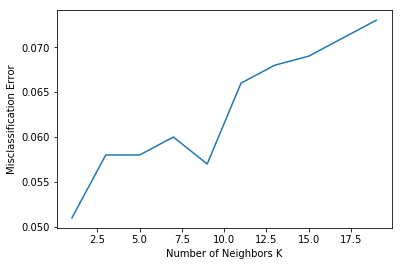

In [68]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [69]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
C=accuracy_score(y_test, y_pred)   #Accuracy of KNN model
print('Accuracy_score:',C)    
print(recall_score(y_test, y_pred))


Accuracy_score: 0.949
0.7045454545454546


In [70]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion_matrix:
[[887  25]
 [ 26  62]]


# D.SVM 

In [71]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = my_data["Personal_Loan"]
features=my_data.drop(['ID','ZIPCode','Experience'], axis =1 )
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.30, random_state = 10)

In [72]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model= SVC(kernel='linear')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)


In [73]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
1.0


In [74]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[1360    0]
 [   0  140]]


In [75]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf = pd.DataFrame({'Kernel':['Linear'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.0


In [76]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9891428571428571
0.9146666666666666


In [78]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['RBF'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.989143


In [79]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0
1.0


In [80]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Poly'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.989143
0,Poly,1.000000


In [81]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

##print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9066666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [82]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Sigmoid'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.989143
0,Poly,1.000000
0,Sigmoid,0.902857


# 13.Comparison of different  Models:

In [83]:
print(A) #Accuracy of Logistic regression model

0.9453333333333334


In [84]:
print(B) #Accuracy of Naive Bayes' Model

0.8793333333333333


In [85]:
print(C)  #Accuracy of KNN Model

0.949


In [86]:
resultsDf #Accuracy of SVM Model

,Kernel,Accuracy
0,Linear,1.000000
0,RBF,0.989143
0,Poly,1.000000
0,Sigmoid,0.902857


# Conclusion:

## The classification goal is to predict the likelihood of a liability customer buying personal loans.

## A bank wants a new marketing campaign; so that they need information about the correlation between the variables given in the dataset. 

## Here I used 4 classification models to study.

## From the accuracy scores , it seems like "KNN" algorithm have the highest accuracy and stability.

## But we can use SVM also as all the Kernels have good accuracy as well.